This is a iPython Notebook document, associated to the manuscript:
# Improved algorithm for the DOSY signal processing
Afef cherni, Émilie chouzenoux, Marc-André Delsuc 


# Fig. 1

PALMA.py:69: RuntimeWarning: invalid value encountered in log
  s = x*(1 - np.log(x)/(1+x)) + A/(1+x-limit)**0.75
PALMA.py:69: RuntimeWarning: invalid value encountered in power
  s = x*(1 - np.log(x)/(1+x)) + A/(1+x-limit)**0.75


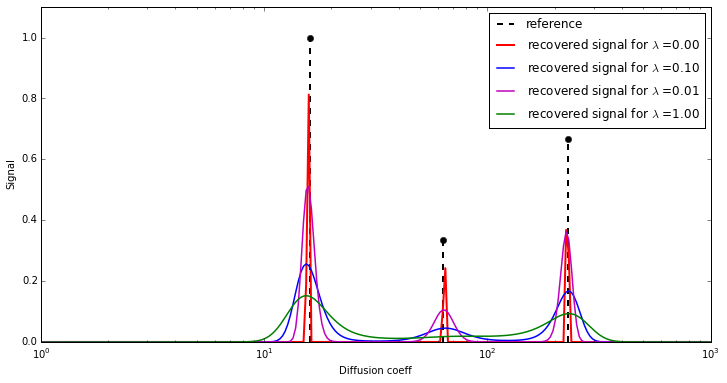

In [1]:
##############################
#Import bib
##############################
import numpy as np
import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import time
import scipy
import scene
import PALMA
##############################
#Measurement parameter
##############################
N = 256
M = 64
delta = 2E-3
Delta = 50E-3
Dmin = 1.0
Dmax = 1000.0
D= 16
noise = 0.001 #noise = 0.1%
##############################
#Measurement
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_exp(D, Delta, invshift=10)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
x = scene.scene_Kazi(N, Dmin, Dmax)
x = x.reshape((N,1))
z = np.dot(K,x) 
sigma = noise*z[0]
np.random.seed(3333)
y = z + sigma*np.random.randn(M,1)
eta = 1.01*np.sqrt(M)*sigma
##############################
#Algorithm parameter
##############################
nbiter = 200000
prec = 1E-14
full_output = False
##############################
#Signal reconstruction
##############################
x_n1, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter=nbiter, lamda=0, prec=prec)
x_n2, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter=nbiter, lamda=0.1, prec=prec)
x_n3, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter=nbiter, lamda=0.01, prec=prec)
x_n4, criters = PALMA.PPXAplus(K, Binv, y, eta, nbiter=nbiter, lamda=1, prec=prec)
##############################
#Graphic result
##############################
plt.figure(figsize=(12,6))
#Plot of Reference Peak
plt.plot([16,16],[0,1],'k--', linewidth = 2, label = "reference")
plt.plot(16,1, 'ko')
plt.plot([63,63],[0,1./3],'k--', linewidth = 2)
plt.plot(63, 1./3, 'ko')
plt.plot([230,230],[0,2./3],'k--', linewidth = 2)
plt.plot(230, 2./3, 'ko')
#Plot of recovered signal
plt.semilogx(Lap_axis,x_n1, "r", linewidth = 2, label= r"recovered signal for $\lambda$ =%0.2f" % 0.00 )
plt.semilogx(Lap_axis,3*x_n2, "b", linewidth = 1.5, label= r"recovered signal for $\lambda$ =%0.2f" % 0.1)
plt.semilogx(Lap_axis,3*x_n3, "m", linewidth = 1.5, label= r"recovered signal for $\lambda$ =%0.2f" % 0.01)
plt.semilogx(Lap_axis,3*x_n4, "g", linewidth = 1.5, label= r"recovered signal for $\lambda$ =%0.2f" % 1.00)

#Axis+legend
plt.ylim(ymin= 0, ymax = 1.1)
plt.xlabel('Diffusion coeff')
plt.ylabel('Signal')
plt.legend()
#plt.savefig('Fig1.eps', format='eps', dpi=1000)

# Fig. 2

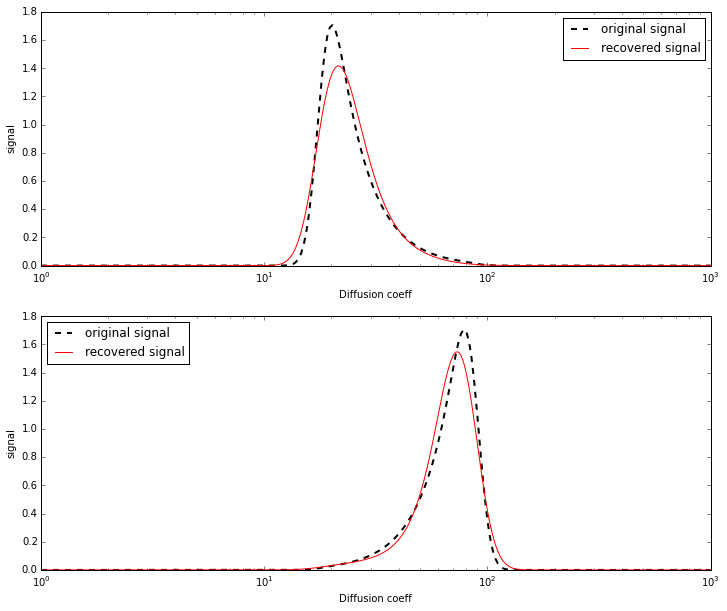

In [2]:
##############################
#C1 and C2 Measurement
##############################
Lap_axis = scene.laplace_axis(N,Dmin,Dmax)
t = scene.t_linear(D, Delta, N=64)
t = t.reshape((M,1))
K = np.exp(-np.kron(t,Lap_axis.T))
Kt = np.transpose(K)
KtK = np.dot(Kt,K)
B = np.identity(N)
B = B + KtK
Binv = np.linalg.inv(B)
np.random.seed(1234)
#C1
x1 = scene.scene_Xu(N, Dmin, Dmax, width=4)
x1 = x1.reshape((N,1))
z1 = np.dot(K,x1) 
sigma1 = noise*z1[0]
y1 = z1 + sigma1*np.random.randn(M,1)
eta1 = 1.01*np.sqrt(M)*sigma1
#C2
x2 = scene.scene_Xu_ass(N, Dmin, Dmax, width=4)
x2 = x2.reshape((N,1))
z2 = np.dot(K,x2) 
sigma2 = noise*z2[0]
y2 = z2 + sigma2*np.random.randn(M,1)
eta2 = 1.01*np.sqrt(M)*sigma2
##############################
#Algorithm parameter
##############################
nbiter = 100000
prec = 1E-14
full_output = False
lamda = 0.01
##############################
#Signal reconstruction
##############################
x_1, criters1 = PALMA.PPXAplus(K, Binv, y1, eta1, nbiter, lamda, prec, full_output)
x_2, criters2 = PALMA.PPXAplus(K, Binv, y2, eta2, nbiter, lamda, prec, full_output)
##############################
#Graphic result
##############################
plt.figure(figsize=(12,10))
#Plot of recovered signal
plt.subplot(2,1,1)
plt.semilogx(Lap_axis,x1, "k--", linewidth = 2, label='original signal')
plt.semilogx(Lap_axis,x_1, "r", linewidth = 1, label='recovered signal')
plt.xlabel('Diffusion coeff')
plt.ylabel('signal')
plt.legend(loc=1)
plt.subplot(2,1,2)
plt.semilogx(Lap_axis,x2, "k--", linewidth = 2, label='original signal')
plt.semilogx(Lap_axis,x_2, "r", linewidth = 1, label='recovered signal')
#Axis+legend
plt.xlabel('Diffusion coeff')
plt.ylabel('signal')
plt.legend(loc=2)
#plt.savefig('Fig2.eps', format='eps', dpi=1000)